# Caltech-UCSD Birds-200-2011 Dataset

In [27]:
%matplotlib inline

import random
import numpy as np
import os
from PIL import Image
from glob import glob
from collections import Counter
from fractions import Fraction

import matplotlib.pyplot as plt

In [50]:
root_dir = '.'
data_dir = os.path.join(root_dir, 'CUB_200_2011')
img_dir = os.path.join(data_dir, 'images')

## Load Image List and Official Train-Test Split

In [13]:
filenames = {}
with open(os.path.join(data_dir, 'images.txt')) as f:
    for l in f:
        if l.strip() != '':
            idx, fn = l.strip().split(maxsplit=1)
            filenames[int(idx)] = fn

train_idx, test_idx = [], []
with open(os.path.join(data_dir, 'train_test_split.txt')) as f:
    for l in f:
        if l.strip() != '':
            idx, is_train = [int(x) for x in l.strip().split()]
            if is_train == 1:
                train_idx.append(idx)
            else:
                test_idx.append(idx)

len(train_idx), len(test_idx)

(5994, 5794)

## Label Distribution

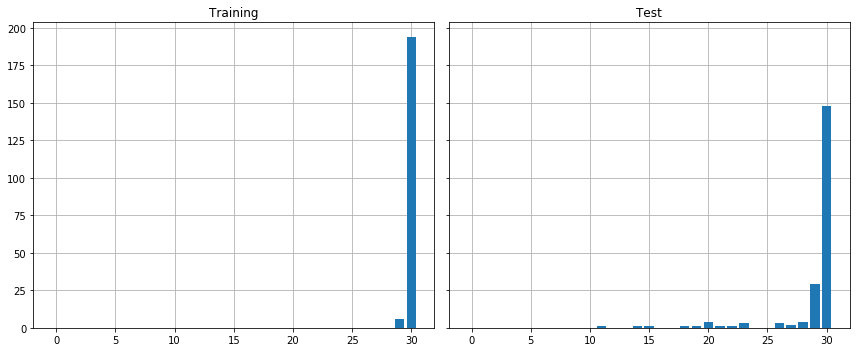

In [22]:
train_class_counts = Counter(os.path.dirname(filenames[idx]) for idx in train_idx)
test_class_counts = Counter(os.path.dirname(filenames[idx]) for idx in test_idx)

train_class_sizes = np.bincount(list(train_class_counts.values()))
test_class_sizes = np.bincount(list(test_class_counts.values()))

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
axes[0].set_title('Training')
axes[0].bar(np.arange(len(train_class_sizes)), train_class_sizes)
axes[1].set_title('Test')
axes[1].bar(np.arange(len(test_class_sizes)), test_class_sizes)
for ax in axes:
    ax.grid()
    ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

## Example Images

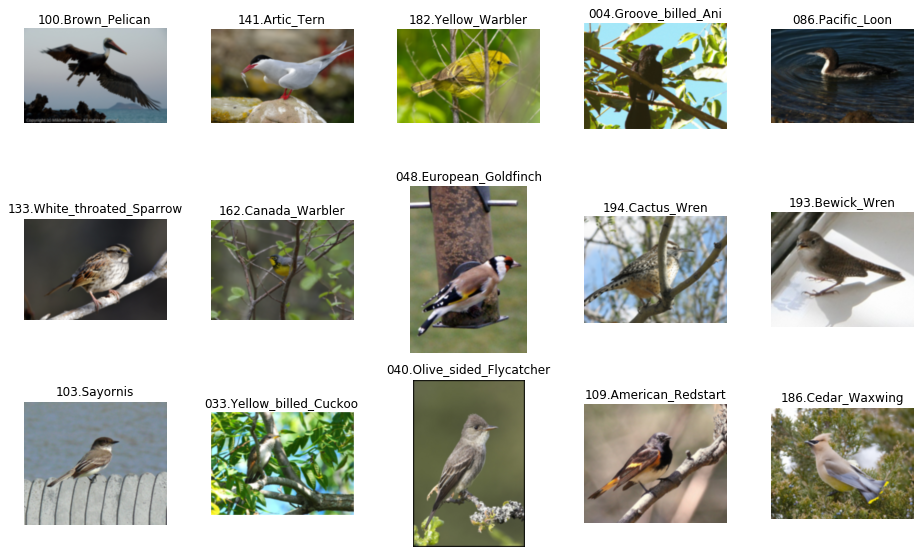

In [26]:
fig, axes = plt.subplots(3, 5, figsize=(13, 8))
for ax in axes.ravel():
    fn = random.choice(list(filenames.values()))
    ax.set_title(os.path.dirname(fn))
    ax.imshow(plt.imread(os.path.join(img_dir, fn)), interpolation='bicubic')
    ax.axis('off')
fig.tight_layout()
plt.show()

## Image Sizes and Aspect Ratios

In [30]:
img_sizes = np.array([Image.open(os.path.join(img_dir, fn)).size for fn in filenames.values()])

In [41]:
for ar, count in Counter(Fraction(int(max(s)), int(min(s))) for s in img_sizes).most_common(10):
    print(f'{ar.numerator:3d}:{ar.denominator:<3d} ({count/img_sizes.shape[0]:.1%})')

500:333 (18.0%)
  4:3   (11.6%)
  5:4   (4.6%)
250:167 (3.9%)
500:357 (2.8%)
125:83  (2.2%)
  1:1   (2.2%)
100:67  (1.6%)
125:94  (0.7%)
  3:2   (0.7%)


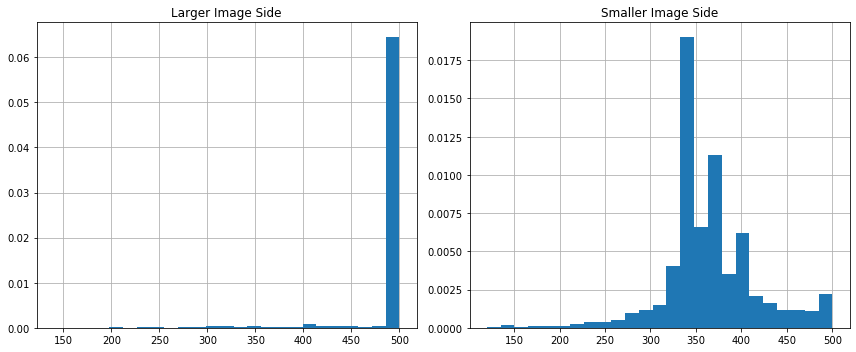

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=False)
axes[0].set_title('Larger Image Side')
axes[0].hist(img_sizes.max(axis=1), bins=25, density=True)
axes[1].set_title('Smaller Image Side')
axes[1].hist(img_sizes.min(axis=1), bins=25, density=True)
for ax in axes:
    ax.grid()
    ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

## Train/Val Split

    Train:   20 imgs/class
    Val:   9-10 imgs/class
    Test: 11-30 imgs/class (official split)

In [52]:
class_members = [[] for _ in range(200)]
for idx in train_idx:
    lbl = int(os.path.dirname(filenames[idx]).split('.')[0], base=10) - 1
    class_members[lbl].append(idx)

for mem in class_members:
    random.shuffle(mem)

In [57]:
with open(os.path.join(root_dir, 'train.txt'), 'w') as f:
    for lbl_idx, mem in enumerate(class_members):
        for idx in mem[:20]:
            f.write(f'{filenames[idx][:-4]} {lbl_idx}\n')

with open(os.path.join(root_dir, 'val.txt'), 'w') as f:
    for lbl_idx, mem in enumerate(class_members):
        for idx in mem[20:]:
            f.write(f'{filenames[idx][:-4]} {lbl_idx}\n')

with open(os.path.join(root_dir, 'trainval.txt'), 'w') as f:
    for lbl_idx, mem in enumerate(class_members):
        for idx in mem:
            f.write(f'{filenames[idx][:-4]} {lbl_idx}\n')

with open(os.path.join(root_dir, 'test.txt'), 'w') as f:
    for idx in test_idx:
        lbl = int(os.path.dirname(filenames[idx]).split('.')[0], base=10) - 1
        f.write(f'{filenames[idx][:-4]} {lbl}\n')